<a href="https://colab.research.google.com/github/carlosviniharo/DEA113-G1/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loading Data


In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
#print(os.listdir('/content'))
url = 'https://raw.githubusercontent.com/carlosviniharo/DEA113-G1/refs/heads/main/exercise_data.csv'
data = pd.read_csv(url)
data.head()

,Duration,Date,Pulse,Maxpulse,Calories
0,60,01-12-2020,110,130,409.1
1,60,02-12-2020,117,145,479.0
2,60,03-12-2020,103,135,340.0
3,45,04-12-2020,109,175,282.4
4,45,05-12-2020,117,148,406.0


In [6]:
data.tail()


,Duration,Date,Pulse,Maxpulse,Calories
27,60,27-12-2020,92,118,241.0
28,60,28-12-2020,103,132,NaN
29,60,29-12-2020,100,132,280.0
30,60,30-12-2020,102,129,380.3
31,60,31-12-2020,92,115,243.0


In [ ]:
data.nunique()

,0
Duration,4
Date,30
Pulse,15
Maxpulse,24
Calories,26


In [ ]:
data.describe()

,Duration,Pulse,Maxpulse,Calories
count,32.000000,32.000000,32.000000,30.000000
mean,68.437500,103.500000,128.500000,304.680000
std,70.039591,7.832933,12.998759,66.003779
min,30.000000,90.000000,101.000000,195.100000
25%,60.000000,100.000000,120.000000,250.700000
50%,60.000000,102.500000,127.500000,291.200000
75%,60.000000,106.500000,132.250000,343.975000
max,450.000000,130.000000,175.000000,479.000000


In [ ]:
data.isnull().sum()

,0
Duration,0
Date,1
Pulse,0
Maxpulse,0
Calories,2



To get the percentage value of nulls


In [ ]:
(data.isnull().sum())/(len(data))*100

,0
Duration,0.000
Date,3.125
Pulse,0.000
Maxpulse,0.000
Calories,6.250


In [ ]:
data.shape

(32, 5)

Data reduction

In [ ]:
#Removing the column Pulse.
data = data.drop(['Pulse'], axis=1)
data.head()

,Duration,Date,Maxpulse,Calories
0,60,01-12-2020,130,409.1
1,60,02-12-2020,145,479.0
2,60,03-12-2020,135,340.0
3,45,04-12-2020,175,282.4
4,45,05-12-2020,148,406.0


In [ ]:
from datetime import date, datetime
print(date.today().year)
print(date.today().month)
print(date.today())

2025
1
2025-01-23


In [ ]:
current_time = datetime.now()
print(current_time)
print("Current Time", current_time.strftime("%H:%M:%S"))

2025-01-23 01:55:31.189772
Current Time 01:55:31


In [ ]:
#Calculated the difference between Pulse and Maxpulse and store it in a new column "DifferenceOfPulse"
data['DifferenceOfPulse'] = data['Maxpulse'] - data['Pulse']
data.head()

,Duration,Date,Pulse,Maxpulse,Calories,DifferenceOfPulse
0,60,01-12-2020,110,130,409.1,20
1,60,02-12-2020,117,145,479.0,28
2,60,03-12-2020,103,135,340.0,32
3,45,04-12-2020,109,175,282.4,66
4,45,05-12-2020,117,148,406.0,31


# Handling missing values.
There are different ways to handling missing values:


1.   Mean
2.   Mode
3.   Median
4.   Drop these columns


In [ ]:
data['Calories'] = data['Calories'].fillna(data['Calories'].mean())
print('Mean of Maxpulse is:', data['Maxpulse'].mean())
print('Median of Maxpulse is:', data['Maxpulse'].median())
print('Mode of Maxpulse is:', data['Maxpulse'].mode()[0])

Mean of Maxpulse is: 128.5
Median of Maxpulse is: 127.5
Mode of Maxpulse is: 120


In [ ]:
data.head(20)

,Duration,Date,Pulse,Maxpulse,Calories,DifferenceOfPulse
0,60,01-12-2020,110,130,409.10,20
1,60,02-12-2020,117,145,479.00,28
2,60,03-12-2020,103,135,340.00,32
3,45,04-12-2020,109,175,282.40,66
4,45,05-12-2020,117,148,406.00,31
5,60,06-12-2020,102,127,300.00,25
6,60,07-12-2020,110,136,374.00,26
7,450,08-12-2020,104,134,253.30,30
8,30,09-12-2020,109,133,195.10,24
9,60,10-12-2020,98,124,269.00,26


In [ ]:
data.shape

(32, 6)

In [7]:
data.isnull().sum()

,0
Duration,0
Date,1
Pulse,0
Maxpulse,0
Calories,2


In [8]:
#all the row of all columns that have null values.
data_clean = data.dropna()

In [9]:
data_clean.shape

(29, 5)

In [10]:
# delete null rows from calories column only
data = data.dropna(subset=['Calories'])
print(data.isnull().sum())
print(data.shape)


Duration    0
Date        1
Pulse       0
Maxpulse    0
Calories    0
dtype: int64
(30, 5)


# Class 7

In [16]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
tempData = pd.DataFrame({
    'Age': [25, 30, np.nan, 35, 40],
    'Salary': [50000, 60000, 55000, np.nan, 65000],
    'City': ['New York', 'San Francisco', np.nan, 'Chicago', 'New York']
})
tempData

,Age,Salary,City
0,25.0,50000.0,New York
1,30.0,60000.0,San Francisco
2,NaN,55000.0,NaN
3,35.0,NaN,Chicago
4,40.0,65000.0,New York


In [19]:
tempData.isnull().sum()

,0
Age,1
Salary,1
City,1


In [20]:
tempData['Age'].fillna(tempData['Age'].mean(), inplace=True)
print ("Mean of Age is:", tempData ['Age'].mean())
tempData['Salary'].fillna(tempData['Salary'].median(), inplace=True)
print ("Median of Salary is:", tempData ['Salary'].median())
tempData['City'].fillna(tempData['City'].mode()[0], inplace=True)
print ("Mode of City is:", tempData ['City'].mode())


Mean of Age is: 32.5
Median of Salary is: 57500.0
Mode of City is: 0    New York
Name: City, dtype: object


In [21]:
tempData.isnull().sum()

,0
Age,0
Salary,0
City,0


In [32]:
tempData

,Age,Salary,City
0,25.0,50000.0,New York
1,30.0,60000.0,San Francisco
2,32.5,55000.0,New York
3,35.0,57500.0,Chicago
4,40.0,65000.0,New York


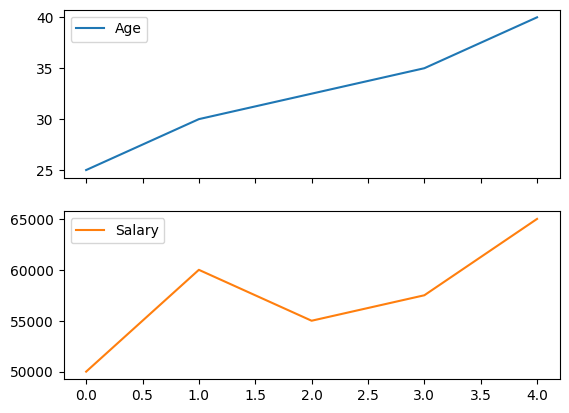

In [30]:
tempData.plot(kind= 'line', subplots= True)
plt.show()

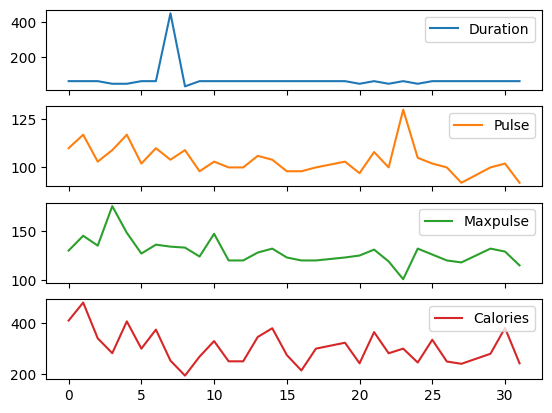

In [31]:
data.plot(kind= 'line', subplots= True)
plt.show()


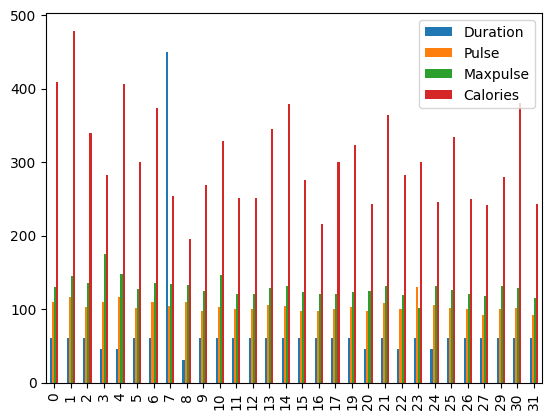

In [28]:
data.plot(kind= 'bar')
plt.show()

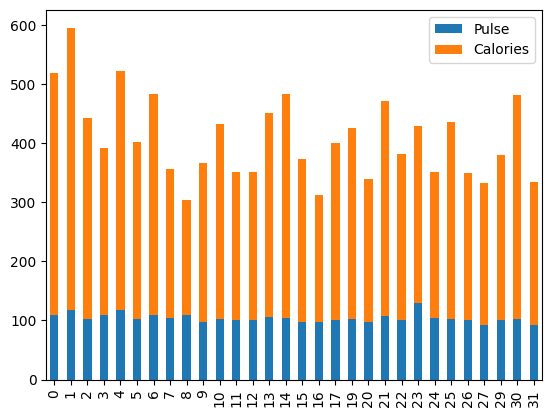

In [29]:
barData = data[['Pulse',  'Calories']]
barData.plot(kind= 'bar', stacked=True)
plt.show()